# Clasificador Bayesiano Ingenuo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB


train = pd.read_csv('https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_entrenamiento.csv')
test = pd.read_csv('https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_prueba.csv')

train['id_blancas'].max(),train['id_blancas'].min()
train.head() 

,id_blancas,id_negras,ganador
0,3,4,1
1,7,8,1
2,40,10,1
3,16,17,1
4,8,18,1


In [ ]:
X = train.loc[:,['id_blancas','id_negras']]
y = train['ganador']

Utilizare el clasificador categorico de la libreta que nos compartio el dr gibran 

In [ ]:
class CategoricalNB:

  def prob_clase_(self):
    return self.qc
  #prob conjunta
  def prob_cond_clase_(self, X):
    """
    Calcula probabilidad condicional dada la clase
    """
    v = np.zeros((X.shape[0], self.clases.size))
    a = np.arange(X.shape[1])
    for k in range(X.shape[0]):
      for i in range(self.clases.size):
        v[k, i] = self.qa[i, a, X[k, a]].sum()
    return v

  def fit(self, X, y, alfa = 2):
    """
    Entrena clasificador bayesiano ingenuo
    """
    # Calcula parámetros de distribución a priori 
    n = X.shape[0]
    self.clases = np.unique(y)
    self.n_clases = self.clases.size
    self.qc = np.zeros(self.clases.size)
    for i,c in enumerate(self.clases):
      # Misma alfa para todas las categorías
      self.qc[i] = (np.sum(y == c) + alfa - 1) / (n + alfa * self.n_clases - self.n_clases)

    # Escala logarítmica para parámetros de a priori
    self.qc[self.qc == 0] = np.nextafter(0, 1)
    self.qc[self.qc == 1] = np.nextafter(1, 0)
    self.qc = np.log(self.qc)

    # Calcula parámetros de verosimilitud 
    self.n_atrib = X.shape[1]

    # Presupone mismas categorías en los dos atributos (mismos posibles jugadores)
    self.n_cat = int(np.max(X)) + 1
    self.qa = np.zeros((self.n_clases, self.n_atrib, self.n_cat))

    # Estima parámetros para cada clase, atributo y categoría (máximo a posteriori)
    for c in self.clases:
      for i in range(self.n_atrib):
        X_ci = X[np.where(y == c), i]
        for j in range(self.n_cat): 
          # Misma alfa para todas las categorías
          self.qa[c, i, j] = (np.sum(X_ci == j) + alfa - 1) / (X_ci.shape[0] + alfa * self.n_cat - self.n_cat)

    # Usa escala logarítmica para parámetros de verosimilitud
    self.qa[self.qa == 0] = np.nextafter(0, 1)
    self.qa[self.qa == 1] = np.nextafter(1, 0)
    self.qa = np.log(self.qa)

  def predict(self, X):
    """
    Predice clases dada un conjunto de datos
    """
    aposteriori = self.prob_clase_() + self.prob_cond_clase_(X)
    return np.argmax(aposteriori, axis = 1), np.max(aposteriori, axis = 1)

  def score(self, X, y):
    """
    Calcula exactitud dado datos
    """
    preds, probs = self.predict(X)
    return np.mean(preds == y) * 100

Exactitud en entrenamiento: 84.64%
Exactitud en prueba: 72.17%


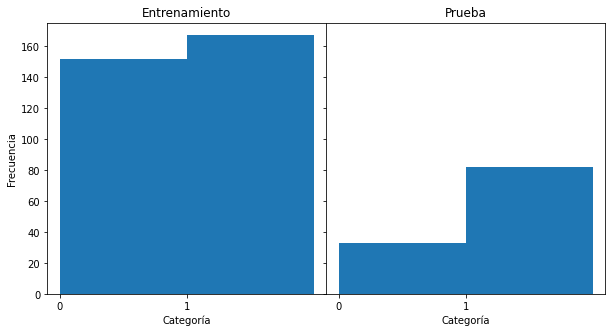

In [ ]:
X_ent = train[['id_blancas', 'id_negras']].to_numpy()
y_ent = train['ganador'].to_numpy()

X_prueba = test[['id_blancas', 'id_negras']].to_numpy()
y_prueba = test['ganador'].to_numpy()

cnb = CategoricalNB()
cnb.fit(X_ent, y_ent)

print('Exactitud en entrenamiento: {0:.2f}%'.format(cnb.score(X_ent, y_ent)))
print('Exactitud en prueba: {0:.2f}%'.format(cnb.score(X_prueba, y_prueba)))

f,axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

axs[0].hist(y_ent, bins=[i for i in range(3)])
axs[0].set_xticks(np.unique(y_ent))
axs[0].set_xlabel(u'Categoría')
axs[0].set_xlabel(u'Categoría')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title(u'Entrenamiento')

axs[1].hist(y_prueba, bins=[i for i in range(3)])
axs[1].set_xticks(np.unique(y_prueba))
axs[1].set_xlabel(u'Categoría')
axs[1].set_title(u'Prueba')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Una vez modelada la probabilidad condicional, podemos generar datos sinteticos, para esto utilizaremos la funcion `sample()` de sklearn que hace esto mas sencillo.

Para esto, necesitamos encontrar la distri ucion de Y, muestrearlo y como sabemos la distribucion de los otras variables las muestreamos tambien y asi generamos los datos sinteticos:

Uso del módulo random de numpy para generar números aleatorios muestreados a partir de una distribución conocida

Exactitud en entrenamiento: 97.00%
Exactitud en prueba: 64.35%


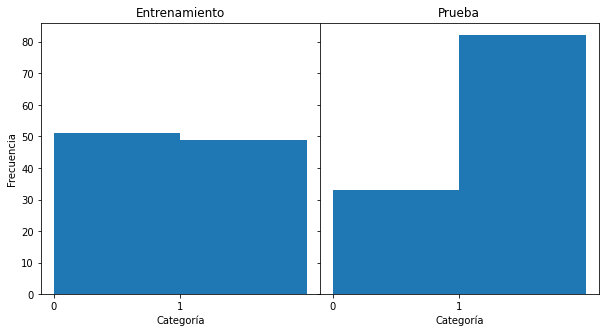

In [ ]:
# 319 para generar otro dataset del mismo tamaño, con la distribucion modelada
sample_df = train.sample(100) # es muestreo aleatorio
sample_df

X_ent = sample_df[['id_blancas', 'id_negras']].to_numpy()
y_ent = sample_df['ganador'].to_numpy()
#probamos en el mismo conjunto de prueba
X_prueba = test[['id_blancas', 'id_negras']].to_numpy()
y_prueba = test['ganador'].to_numpy()

cnb = CategoricalNB()
cnb.fit(X_ent, y_ent)

print('Exactitud en entrenamiento: {0:.2f}%'.format(cnb.score(X_ent, y_ent)))
print('Exactitud en prueba: {0:.2f}%'.format(cnb.score(X_prueba, y_prueba)))

f,axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

axs[0].hist(y_ent, bins=[i for i in range(3)])
axs[0].set_xticks(np.unique(y_ent))
axs[0].set_xlabel(u'Categoría')
axs[0].set_xlabel(u'Categoría')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title(u'Entrenamiento')

axs[1].hist(y_prueba, bins=[i for i in range(3)])
axs[1].set_xticks(np.unique(y_prueba))
axs[1].set_xlabel(u'Categoría')
axs[1].set_title(u'Prueba')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

# Regresion logistica (binaria)




Vamos a entrenar un modelo de regresión lineal usando descenso por gradiente. En particular, buscaremos minimizar la suma de errores cuadráticos, la cual definimos de la siguiente manera:
$$
E(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{2} \sum_{i = 1} ^n \left(\hat{y^{(i)}} - y^{(i)}\right)^2
$$

El gradiente de esta función de pérdida respecto a los parámetros $\boldsymbol{\theta} \in \mathbb{R}^d$ está dado por

$$
\nabla E(\mathbf{y}, \hat{\mathbf{y}}) = \left[\frac{\partial E(\mathbf{y}, \hat{\mathbf{y}})}{\partial \theta_0}, \frac{\partial E(\mathbf{y}, \hat{\mathbf{y}})}{\partial \theta_1}, \cdots, \frac{\partial E(\mathbf{y}, \hat{\mathbf{y}})}{\partial \theta_d}\right]
$$

donde

$$
\frac{\partial E(\mathbf{y}, \hat{\mathbf{y}})}{\partial \theta_j} = \sum_{i=1}^n \left[ \left(\hat{y^{(i)}} - y^{(i)}\right) \cdot x_j^{(i)} \right]
$$

Me basé en este tutorial para entender un poco mas a profundidad la [regresion logistica](https://www.cienciadedatos.net/documentos/py17-regresion-logistica-python.html)

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Utilizare la funcion MinMaxScaler() de sklearn para cambiar la codificacion de los datos de entrada. Basicamente esta funcion transforma las características escalando cada una de ellas a un rango determinado.

Este estimador escala y traduce cada característica individualmente de manera que se encuentre en el rango dado en el conjunto de entrenamiento, por ejemplo, entre cero y uno

In [ ]:
#Normalizamos los datos de X, con min max scaler

from sklearn.preprocessing import OneHotEncoder
train = pd.read_csv('https://raw.githubusercontent.com/gibranfp/CursoAprendizajeAutomatizado/master/data/partidas_entrenamiento.csv')

X_ent = train[['id_blancas', 'id_negras']].to_numpy()
y = train['ganador'].to_numpy()
#intente con StandardScaler() y tampoco obtuve mejors resultados
scaler = MinMaxScaler()
X=scaler.fit(X_ent)

X= scaler.transform(X_ent)


Defino la clase LogisticRegression_(), la funcion update_weights basicamente calcula la regla de actualizacion en cada iteración, despues deiniendo la funcion fit que hace uso de esta anterior, ajustando los parametros. Y por ultimo la funcion predict que nos retorna las salidas y.

In [ ]:
class LogisticRegression_() : 
    def __init__(self, alpha, iterations):
        self.alpha = alpha         
        self.iterations = iterations 
     #regla de actualizacion       
    def update_weights(self) :            
        A = 1 / (1 + np.exp(-(self.X.dot(self.W)+self.b))) 
     
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        
        self.W = self.W - self.alpha * dW     
        self.b = self.b - self.alpha * db 
          
        return self

    def fit( self, X, Y ) :         
        self.m, self.n = X.shape         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y             
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 

Veamos el accuracy de nuestro descenso por gradiente

In [ ]:
alpha =0.01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 
  
model = LogisticRegression_(alpha,iterations = 50) 
  
model.fit(X_train,y_train)     
model1 = LogisticRegression()     
model1.fit(X_train,y_train) 
Y_pred = model.predict(X_test)     
Y_pred1 = model1.predict(X_test) 
aux = 0    
aux1 = 0
count = 0   
for count in range(np.size(Y_pred)):   
    
    if y_test[count] == Y_pred[count]:             
        aux = aux + 1
      
    if y_test[count] == Y_pred1[count]:             
        aux1 = aux1 + 1
          
    count = count + 1
      
print( "Accuracy de mi modelo:",(aux/count) * 100) 
print( "Accuracy de sklearn :",(aux1/count) * 100) 

Accuracy de mi modelo: 51.4018691588785
Accuracy de sklearn : 57.009345794392516


Curva ROC

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.545


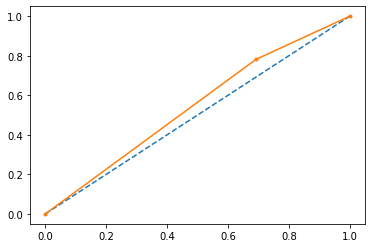

In [ ]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
#con 100 iteraciones obtengo algo poco diferente al modelo sin entrenar 
model = LogisticRegression_(alpha = 0.9, iterations= 100)  
  
model.fit(X_train,y_train)     
# Predecimos las probabilidades
lr_probs = model.predict(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#area bajo la curva
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')


Podemos ver el pobre resultado que obtenemos con el modelo, ya que tiene ≈ .055 mas de area por debajo de la curva, debido al accuracy del modelo

In [ ]:
# Evaluamos con K fold
from numpy import mean,std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_ent = train[['id_blancas', 'id_negras']].to_numpy()
y = train['ganador'].to_numpy()

scaler = MinMaxScaler()
X=scaler.fit(X_ent)

X= scaler.transform(X_ent)
X

# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.527 (0.054)


**¿Qué ventajas y desventajas tienen los modelos entrenados?**


**¿Qué pasaría si se entrena el clasificador bayesiano ingenuo con los vectores recodificados o si se entrena un modelo de regresión logística usando los vectores de entrada originales?**
Afecta en el grado que hacen las predicciones/clasificaciones ya que es importante obtener la distribucion de los datos para poder implementar correctamente un tipo de clasificador o modelo de regresion

**¿Consideras que las presuposiciones de cada clasificador son apropiadas para los datos del problema? ¿Para este tipo de problemas cuál de los dos recomendarías y por qué?**

No, siempre hay que tener un buen grasp en la relacion que tienen los datos en si. Y en este caso en especifico yo eligiría el clasificador ingenuo, debido a la distribucion de los datos, es mas facil implementarlo de esta manera.

## Ejercicio Extra

Deriva la regla de actualización para el algoritmo del descenso por gradiente de un clasificador donde $$ \hat{y} = sigm(Θ^{T}x) $$
y la funcion de perdida es:
$$
E(Θ) = \frac{1}{2} \sum_{i = 1} ^n \left(\hat{y^{(i)}} - y^{(i)}\right)^2
$$

# Regresión logística vs clasificador bayesiano ingenuo

Primero haremos ambos en spam y luego ambos en cancer

Regresion logistica en spam

In [ ]:
from sklearn.model_selection import StratifiedKFold 

df = pd.read_csv('http://turing.iimas.unam.mx/~gibranfp/cursos/aprendizaje_automatizado/data/spam.csv', delim_whitespace=' ', header=None)

data = df.to_numpy()
y = data[:,-1]
X = np.delete(data,-1, axis = 1 )
X.shape, y.shape


((5172, 2000), (5172,))

In [ ]:
alpha =0.001
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0) 
  
model = LogisticRegression_(alpha,iterations = 50) 
  
model.fit(X_train,y_train)     
model1 = LogisticRegression()
model1.fit(X_train,y_train) 
Y_pred = model.predict(X_test)     
Y_pred1 = model1.predict(X_test) 
aux = 0    
aux1 = 0
count = 0   
for count in range(np.size(Y_pred)):   
    
    if y_test[count] == Y_pred[count]:             
        aux = aux + 1
      
    if y_test[count] == Y_pred1[count]:             
        aux1 = aux1 + 1
          
    count = count + 1
      
print( "Accuracy de mi modelo:",(aux/count) * 100) 
print( "Accuracy de sklearn :",(aux1/count) * 100) 

Accuracy de mi modelo: 73.49187935034803
Accuracy de sklearn : 96.98375870069606


CLasificador bayesiano en spam

Exactitud en entrenamiento: 70.36%
Exactitud en prueba: 72.27%


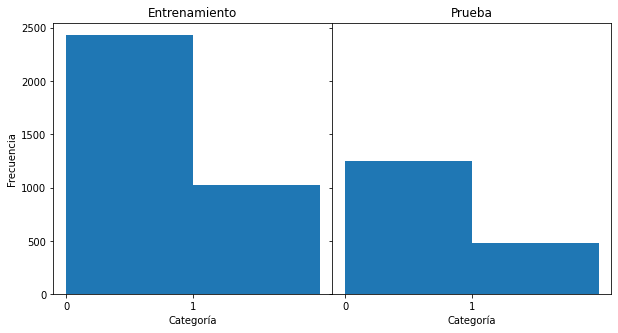

In [ ]:
cnb = CategoricalNB()
cnb.fit(X_train, y_train)

print('Exactitud en entrenamiento: {0:.2f}%'.format(cnb.score(X_train, y_train)))
print('Exactitud en prueba: {0:.2f}%'.format(cnb.score(X_test, y_test)))

f,axs = plt.subplots(1,2, figsize=(10,5), sharey=True)

axs[0].hist(y_train, bins=[i for i in range(3)])
axs[0].set_xticks(np.unique(y_ent))
axs[0].set_xlabel(u'Categoría')
axs[0].set_xlabel(u'Categoría')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title(u'Entrenamiento')

axs[1].hist(y_test, bins=[i for i in range(3)])
axs[1].set_xticks(np.unique(y_test))
axs[1].set_xlabel(u'Categoría')
axs[1].set_title(u'Prueba')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


Regresion logistica en cancer


Aqui por simplicidad utilicé la regresion de sklearn

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 

data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.columns = ['Sample code number','Clump Thickness','Uniformity Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

column_names = ['Sample code number','Clump Thickness','Uniformity Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

#replace '?' for NaN 
data=data.replace(to_replace='?',value=np.nan)
missing = pd.isna(data).sum()

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']) # convertir la columna a tipo numerico (estaba en str)
data['Bare Nuclei'] = round(data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean()),2)
missing = pd.isna(data).sum()

y = data['Class']

data = data.drop(['Sample code number','Class'], axis = 1)
data.head(25) ## 16 inputting media (3.548387)

x = data

alpha =0.001
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0) 
  
  
model1 = LogisticRegression()
model1.fit(X_train,y_train) 
y_test = model1.predict(X_test) 

scaler = preprocessing.MinMaxScaler() #utilizamos de nuevo minmax para evitar error en las operaciones 

x_scaled = scaler.fit_transform(x) 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    model1.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(model1.score(x_test_fold, y_test_fold)) 
   
print('\nList of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 



List of possible accuracy: [0.9785714285714285, 0.9571428571428572, 0.9571428571428572, 0.9640287769784173, 0.9640287769784173]

Maximum Accuracy That can be obtained from this model is: 97.85714285714285 %

Minimum Accuracy: 95.71428571428572 %

Overall Accuracy: 96.41829393627954 %


Clasificador bayersiano en cancer

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
train
mnb = MultinomialNB()
mnb=mnb.fit(X_train,y_train)
y_train_pred=mnb.predict(X_train)

accuracy = mnb.score(X_train, y_train)

# cv es el parametro donde le pasamos cuantos k seran los folds 
# seleccionamos mse en el parametro scoring, segun : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

#stratifiedkfold 


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
lst_accu_stratified = [] 
   
scaler = preprocessing.MinMaxScaler() #utilizamos de nuevo minmax para evitar error

x_scaled = scaler.fit_transform(x) 
for train_index, test_index in skf.split(x, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    mnb.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(mnb.score(x_test_fold, y_test_fold)) 
   
print('\nList of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nOverall Accuracy:', 
      mean(lst_accu_stratified)*100, '%') 



List of possible accuracy: [0.9, 0.9142857142857143, 0.8785714285714286, 0.8848920863309353, 0.8705035971223022]

Maximum Accuracy That can be obtained from this model is: 91.42857142857143 %

Minimum Accuracy: 87.05035971223022 %

Overall Accuracy: 88.9650565262076 %


En esta ultima parte podemos ver que en regresion logistica (con la clase de sklearn) tenemos un accuracy mayor, asi como tambien en el de spam. Pero a grosso modo, puedo concluir que el accuracy de mi modelo de decenso por gradiente tiene un buen grado de prediccion en termino generales.(No logre validar los dos primeros con stratifiedkfold por el tiempo ya que no queria entregar la tarea con mas retraso)